#### EXPLORATORY DATA ANALYSIS

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Vocabulary
* stories ~ storey = piso/ niveles

* basement = sótano

* hotwaterheating = calefacción / agua caliente

* furnishingstatus = estado del mobiliario

* mainroad = cercanía a la autopista

In [3]:
print(f'Number of null values in the dataset: {df.isnull().values.any().sum()}')
print(f'Number of duplicated rows: {df.duplicated().sum()}')

df = df.drop_duplicates()

Number of null values in the dataset: 0
Number of duplicated rows: 0


In [4]:
df = df.replace({'no': 0, 'yes': 1, 'furnished' : 1, 'semi-furnished' : 0, 'unfurnished' : -1})

In [19]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
df.to_csv('data/data_numeric.csv', index=False)

In [4]:
df = df.replace({'no': 0, 'yes': 1})

In [5]:
furnishingstatus = pd.get_dummies(df['furnishingstatus']) 
df = pd.DataFrame.join(df, furnishingstatus)


In [6]:
df = df.replace({'False': 0, 'True': 1})

In [69]:
df = df.drop(columns=['furnishingstatus'])  

In [70]:
df['furnished'] = df['furnished'].astype(int)
df['semi-furnished'] = df['semi-furnished'].astype(int)
df['unfurnished'] = df['unfurnished'].astype(int)

In [58]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [26]:
df.to_csv('data/data_numeric_dummi.csv', index=False)

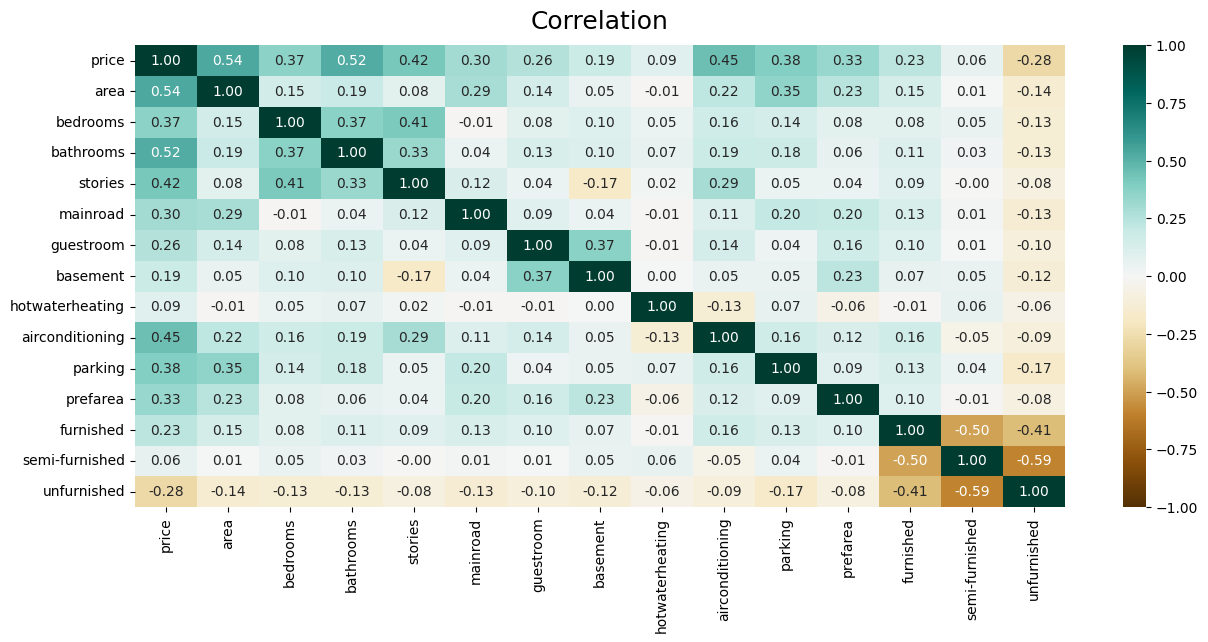

In [59]:
corr_df = df.corr(numeric_only=True)

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=12);

plt.show()

In [32]:
df['stories_area'] = df['area'] / df['stories']
df['rooms_area'] = df['area'] / (df['bedrooms'] + df['bathrooms'])
df['airconditioning_area'] = (df['airconditioning']) /df['area'] 

In [72]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df[['area_normalizada', 'stories_area', 'rooms_area']] = scaler.fit_transform(df[['area', 'stories_area', 'rooms_area']])

In [71]:
df['stories_area'] = df['area'] / df['stories']
df['rooms_area'] = df['area'] / (df['bedrooms'] + df['bathrooms'])
# df['airconditioning_area'] = (df['airconditioning']) /df['area_normalizada'] 

In [74]:
df.drop(['area'], axis=1, inplace=True)

In [73]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,stories_area,rooms_area,area_normalizada
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,-0.453554,-0.036818,1.046726
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,-0.557532,-0.242513,1.757010
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,0.663464,1.294912,2.218232
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,0.115353,-0.013310,1.083624
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,0.097528,0.399256,1.046726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,-0.218861,-0.454086,-0.991879
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,-0.486232,-1.159327,-1.268613
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0.057423,-0.089711,-0.705921
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,-0.258967,-0.934531,-1.033389


In [75]:
df.to_csv('data/data_normal.csv', index=False)

<Axes: ylabel='parking'>

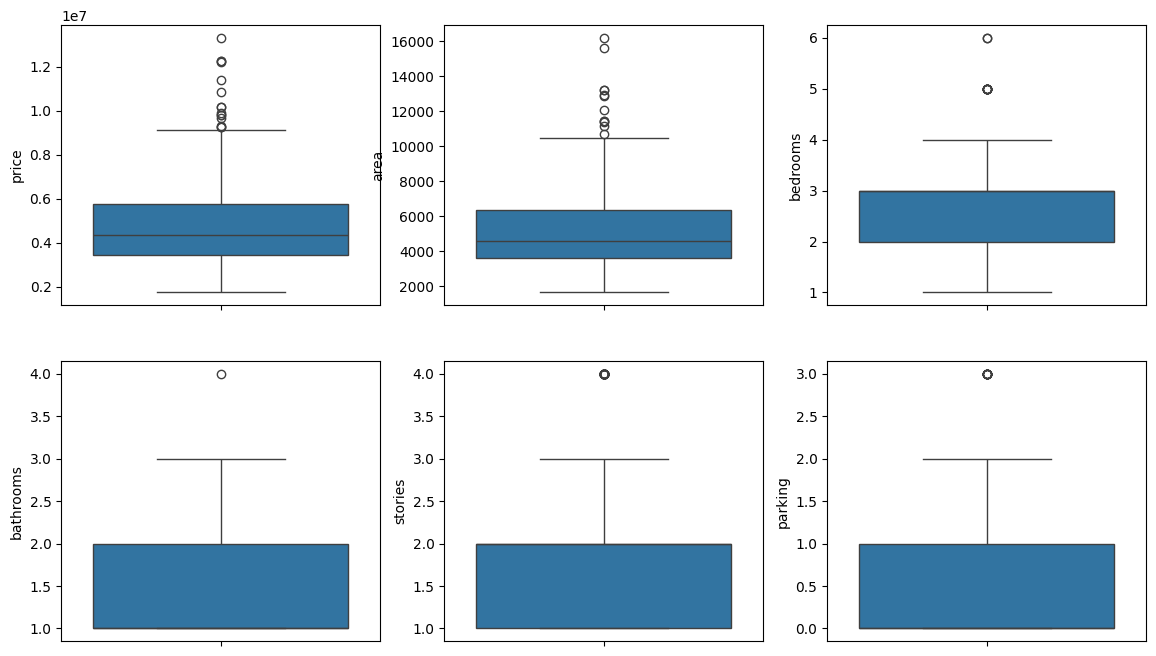

In [ ]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(14,8))
sns.boxplot(df['price'],ax=axs[0,0])
sns.boxplot(df['area'],ax=axs[0,1])
sns.boxplot(df['bedrooms'],ax=axs[0,2])
sns.boxplot(df['bathrooms'],ax=axs[1,0])
sns.boxplot(df['stories'],ax=axs[1,1])
sns.boxplot(df['parking'],ax=axs[1,2])

<AxesSubplot: >

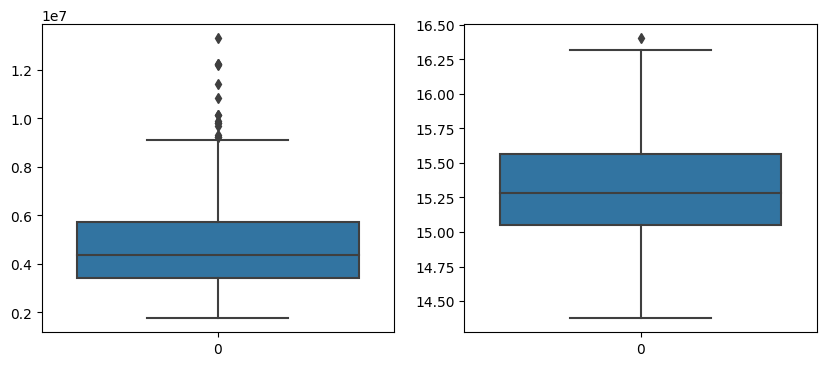

In [14]:
fig,axs=plt.subplots(1, 2,figsize=(10,4))
sns.boxplot(df['price'],ax=axs[0])
sns.boxplot(np.log(df['price']),ax=axs[1])


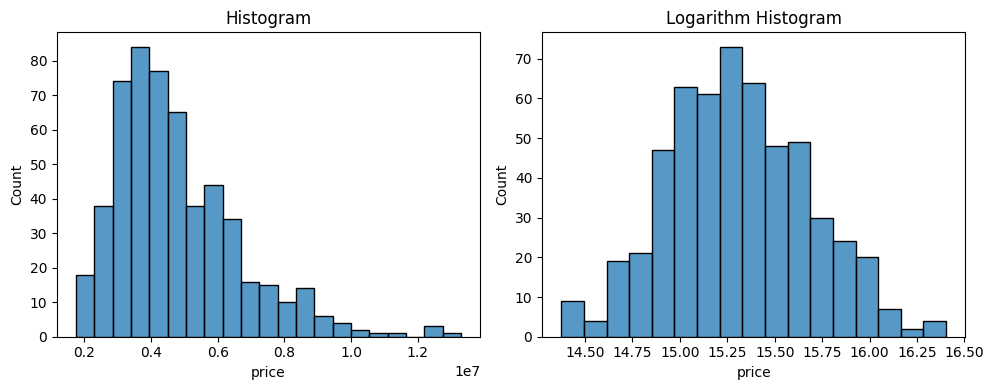

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['price'], ax=axs[0])
axs[0].set_title('Histogram')

sns.histplot(np.log(df['price']), ax=axs[1])
axs[1].set_title('Logarithm Histogram')

plt.tight_layout()
plt.show()

In [15]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,-1,0,1
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,1


In [13]:
target = 'price'
features = [i for i in df.columns if i not in [target]]

In [14]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 11 categorical features.


In [15]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [16]:
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


(545, 24)

In [17]:
df3

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
541,1767150,2400,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
542,1750000,3620,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
543,1750000,2910,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


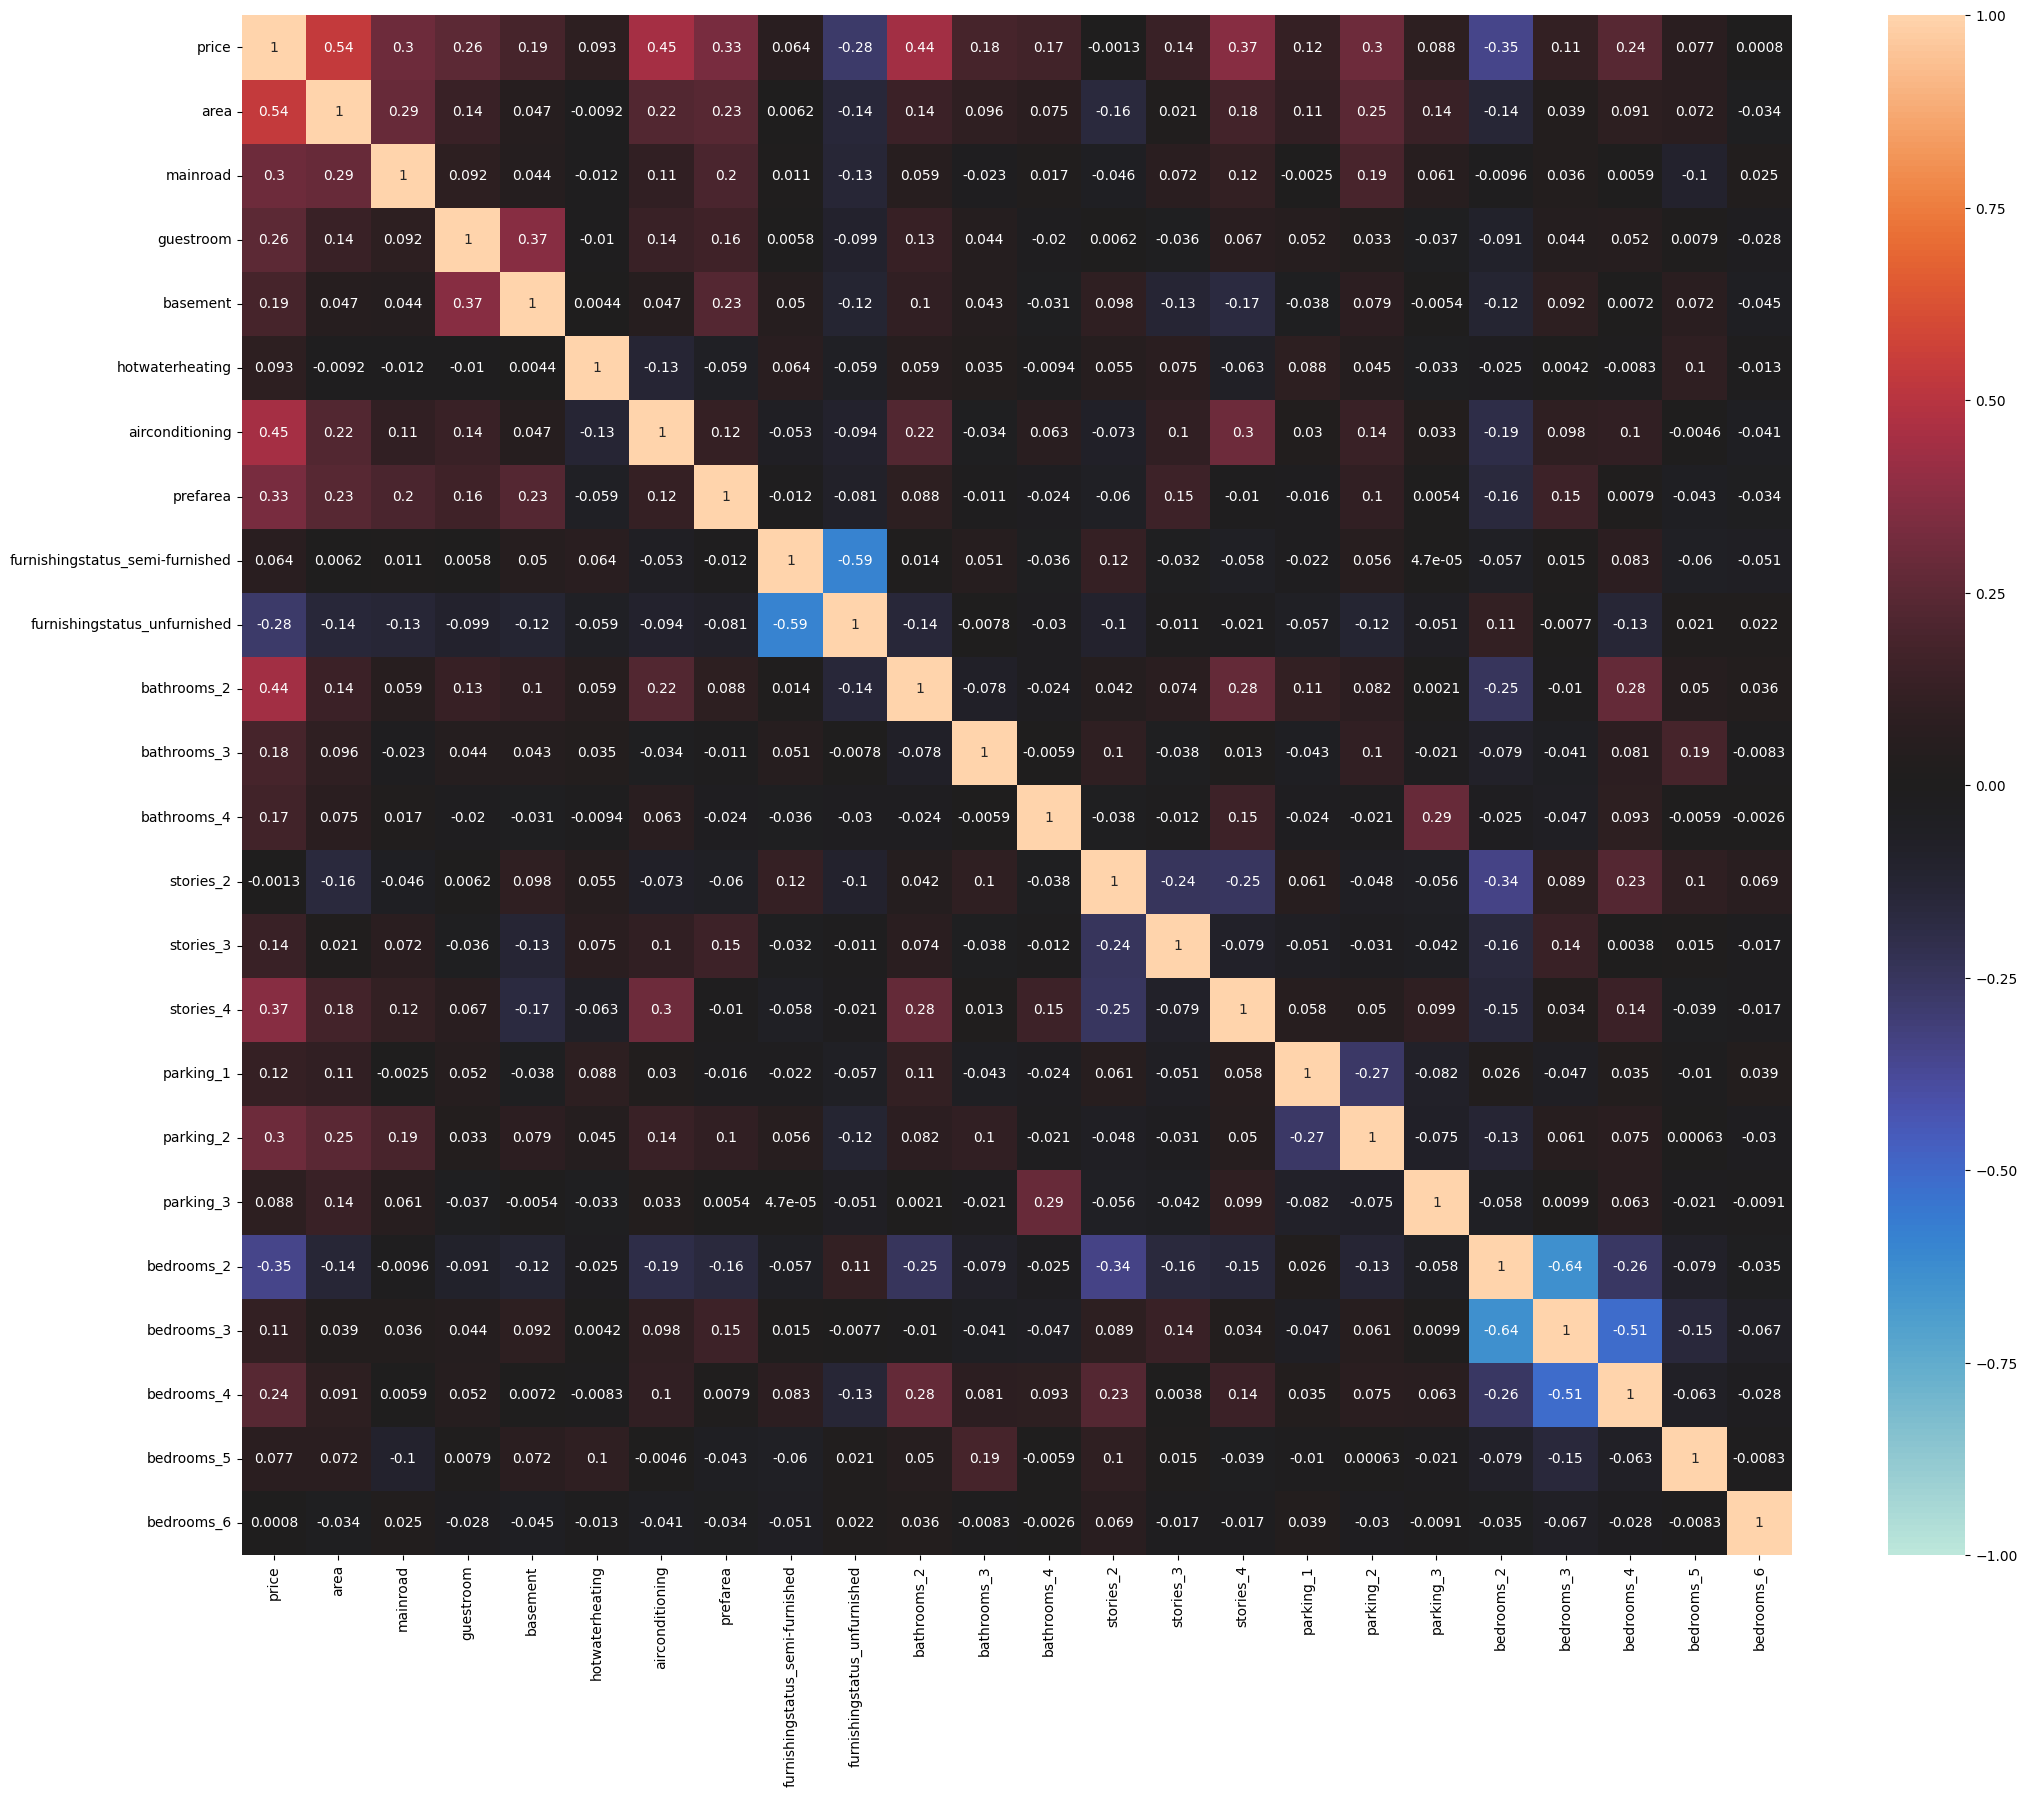

In [20]:
plt.figure(figsize=[25,20])
sns.heatmap(df3.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [19]:
df3.to_csv('data/data_dummis.csv', index=False)